# Data Wrangling OSM Project

## Student: Peter Bakke

# Project Description

"Choose any area of the world in https://www.openstreetmap.org or other OSM data provider and use data wrangling techniques, such as assessing the quality of the data for validity, accuracy, completeness, consistency and uniformity an to clean the OSM data for a part of the world that you care about. Use SQL or MongoDB and apply your chosen schema to the project." (See Udacity reference) [I used SQLite3 as my SQL platform.]

## OSM Map Area: Newport, RI and vicinity

I chose the Newport, RI, USA area for my project primarily because it was one of my favorite places to live when I was a software programmer in the IBM Federal Systems Division. I had to expand the geographic area to include other cities in the Newport vicinity because of the project requirement to have a OSM data file of at least 50 MB. Also, this map is interesting because it shows several military installations that are blocked from mapping. I was able to obtain this particular map only by using the Overpass API (http://overpass-api.de/api/map?bbox=-71.6865,41.2541,-70.6084,41.7016) .... because openstreet.org did not allow me to download a file larger than about 30 MB. Also, I had to make several attempts to download the data from several sources to make the file size adequate because the OSM site blocked my IP address causing me to not being able to download anything at all.

See this short discussion:
***
Regarding www.openstreetmap.com's export functionality. What's the biggest area (in km or miles) one can download?  

Answer: 

Currently it is 0.25 degrees squared (e.g. 1°x0.25° or 0.5x0.5° etc), or an area containing 50,000 nodes, whichever limit is reached first. In densely mapped areas, the node limit will be reached well before the extent limit.

Use third party services like Overpass API or http://extract.bbike.org/ for larger custom downloads.
***

P.S. I made the mistake of using bbbike data ( https://extract.bbbike.org/ ) ... it turns out that bbbike.org data is not in the same format as OSM. This mistake set me back several days before I realized why my code was breaking due to the format difference in the exported data. Don't use bbbike.org data for your project.

### Image of the area of interest: Newport RI and surrounding area. 

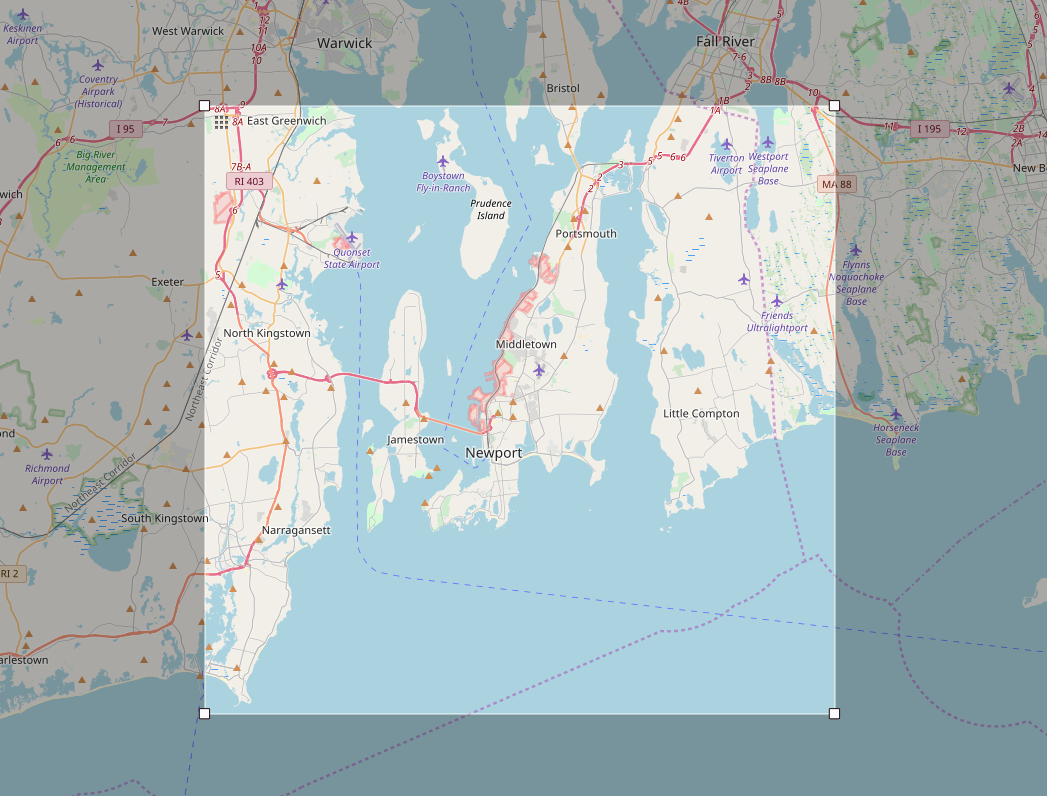

In [22]:
from IPython.display import Image
Image("http://www.peterbakke.com/wp-content/uploads/2017/10/newport-osm-10-19-2017.png", width ="600")

### I Created a sample file from original file.

The Python code for generating the sample file was provided by Udacity here: create_sample_file.py  

#### original file size = 62 MB, sample file size= 6 MB

I used the resulting sample file for testing purposes before processing the original file.<p> 

<b>I provide the sample file and the  CSV files for the grader via a link to GIT here: </b><p>

Once all my code was working, I started using the original file as the input file.

### Results of inspecting street names using original file
#### See inspect_street_names.py

\#201: 1 <br>
Ave: 49 <br>
Ave.: 3 <br>
Avenue: 93 <br>
Blvd: 2 <br>
Boulevard: 6 <br>
Broadway: 2 <br>
Circle: 16 <br>
Court: 32 <br>
Dr: 11 <br>
Dr.: 21 <br>
Drive: 445 <br>
Highway: 2 <br>
Lane: 22 <br>
Ln: 1 <br>
Raod: 1 <br>
Rd: 71 <br>
Rd.: 1 <br>
Road: 385 <br>
Square: 1 <br>
St: 50 <br>
St.: 7 <br>
Street: 309 <br>
Trail: 10 <br>
Way: 55 <br>
Wharf: 1 <br>
wht: 1 <br>

## - Updating street names, shaping and saving all data as CSV files - <br><br> Performed upon the original 62 MB OSM data file:

#### See fix_and_shape.py

Note: In this code file, I made an improvement (in my opinion) to the code we used in the Udacity quizzes: In the 'shaping' Python code file, I simplified the "fix_street(elem)" function by eliminating several lines of code that are not needed for this project. Specifically, many students have kept the call to the "audit_street_type()" function. Doing so is not necessary for this project, so I eliminated that function call as well as the function itself in order to increase efficiency and readability.<p>

I have included a snippet of the 'improved/simplified' code here:<p>

    def fix_street(elem):
        if elem.tag == "node" or elem.tag == "way":
            for tag in elem.iter("tag"):
                if is_street_name(tag):
                    street_name = tag.attrib['v']  # Full street name
                    m = street_type_re.search(street_name)
                    if m:
                        street_type = m.group()                  ### Assign street type 
                        if street_type not in expected:        
                            if street_type in mapping:
                                new_name = street_name.replace(street_type, mapping[street_type])   
                                if new_name != street_name:
                                    tag.attrib['v'] = new_name
                                    return     
            

### Update Street Names per US Postal Service and Google best practices

- Rationale for using abbreviations instead of spelled out (long form) street names:

I decided to update or 'fix' street addresses a bit differently from other students by using uniform abbreviations suggested by the United States Postal Service [link: http://pe.usps.gov/text/pub28/28apc_002.htm]. My digital marketing experience has taught me that Google suggestions for best practices seem to closely follow USPS abbreviation guidelines for street types. Processing shorter strings saves processing time, resources, etc., and human readability is not negatively impacted by the abbreviated address components. Therefore, there is an advantage to abbreviate rather than spell out street types. Here is a link to my thoughts on this subject:  http://www.peterbakke.com/seo/preferred-google-street-mapping-abbreviations/ 

Additional comment: Because the "expected" and "mapping" list/dict were both so large due to my use of USPS abbreviations, including them in-line made the code cumbersome to read. (see 'expected.py' and 'mapping.py'). After considerable  research, I learned how to import source files into Python code and imported those objects. Discovering this best practice will help me elsewhere in my data analysis career as coding gets more complex and code files get larger. There is no need to include large data objects in-line... importing is a better practice. It makes the code more readable.

- The basic format for importing source files is the following:

<b>IMPORT imp <br>
any_name = imp.load_source(name_of_source_file, location_of_source_file) <br>
FROM name_of_source_file IMPORT var1, var2, list1, dict1, etc..... <br></b>


### Sample output of my 'fix_street' function: (Note the use of USPS abbreviations and capitalization in the 'updated' street names)

River Street  =>  <b>River ST </b><br>
Broad Rock Road  =>  <b>Broad Rock RD</b> <br>
Connell Highway  =>  <b>Connell HWY</b> <br>
Cedar Avenue  =>  <b>Cedar AVE </b><br>
Post Road  =>  <b>Post RD</b> <br>


# - Data Overview -

After updating the street names and confirming data in the map file, the original 62 MB OSM XML data was converted to CSV. The CSV was then inserted to a SQLite3 database. This was all done in the fix_and_shape.py

I'm not a fan of command line SQL queries. I feel that I need a GUI to be most productive. Therefore, I did some research and discovered the free <b>DB Browser for SQLite</b> for organizing the DBs and executing SQL queries locally on my machine. (Link to DB Browser for SQLite here: http://sqlitebrowser.org/ )

I imported the csv files with the updated treet names into b>DB Browser for SQLite</b> Please see image here:



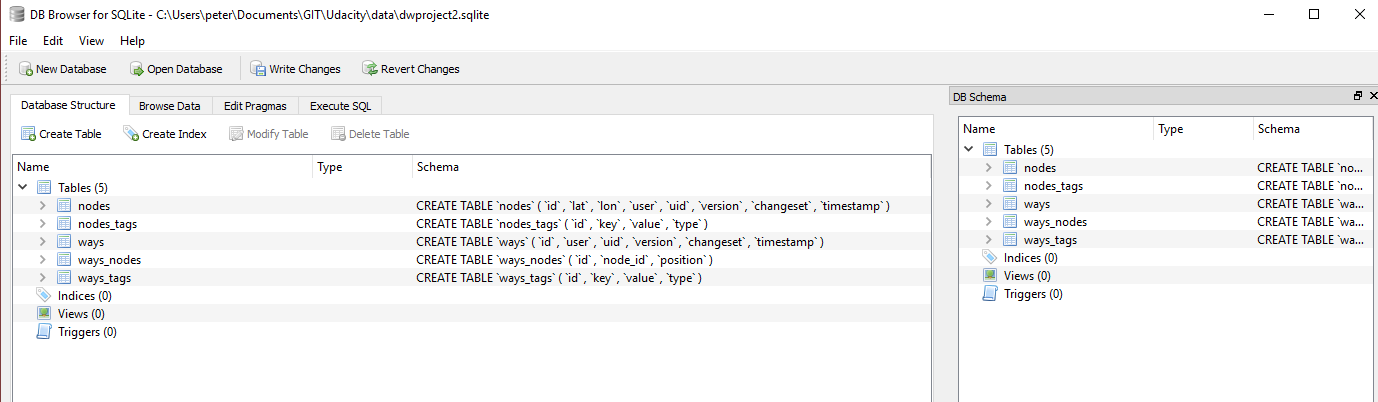

In [4]:
from IPython.display import Image
Image("http://www.peterbakke.com/wp-content/uploads/2017/10/db_browser_data_wrangling_project.png", width ="1000")

## Using SQL, determine if there was any formatting problem with postal codes

There appeared to be no problems format or consistency regarding the postal codes in this data file. They looked clean. However, I did discover that there are two formats for postal codes that need to be taken into consideration when querying the database.<p> 
These two formats are described in the WHERE clause of the SQL query here: <br> <br>

<b>
SELECT tags.value, COUNT(\*) as count <br>
FROM (SELECT * FROM nodes_tags  <br>
	  UNION ALL  <br>
      SELECT * FROM ways_tags) tags<font color='blue'><br>
WHERE key='tiger:zip_left' or key='addr:postcode' </font><br> 
GROUP BY tags.value <br>
ORDER BY count DESC <br>
LIMIT 10; <br>
</b>
 <br>
Following is the list of the top 10 postal codes. Overall, postal codes looked very clean. This may be due to many entries being generated by the US Census Bureau TIGER program (please see references). <p>

Newport is a relatively small city, whereas some surrounding cities included in the data file are larger. I had to include portions of these bigger cities in order to make the data file large enough (>50 MB) for this project.
 <br> <br>
List of top postal codes (02840 is Newport. Edited for readability) <br>
 <br> 
 
Postal Code|Count
--- | ---
02818|1491  
02852|556  
02882|513  
02840|447    
02871|407  
02878|342  
02842|301  
02879|263  
02835|218  
02874|137  

As a follow up, I wanted to prove to myself that I at least had the <b><i>county</i></b> of Newport in my data (which includes several cities, including Newport), so I used the 'LIKE' SQL operator to query  'county' in the DB:<p>

SELECT tags.value, COUNT(\*) as count  <br>
FROM (SELECT * FROM nodes_tags UNION ALL  <br>
      SELECT * FROM ways_tags) tags <br>
WHERE tags.key LIKE <b><font color='blue'>'%county%'</font></b> <br>
GROUP BY tags.value <br>
ORDER BY count DESC; <p>


And this was confirmed (top 4, edited for readability): <p> 

County|Count
--- | ---
Newport, RI|3586 
Washington, RI|2470 
Kent, RI|621 
Bristol, RI|100 



### File sizes:

Python programmatic way to find file sizes.. Thanks to https://www.w3resource.com/python-exercises/file/python-io-exercise-11.php


import os <br>
    
def file_size(fname): <br>
        statinfo = os.stat(fname) <br>
        return statinfo.st_size <br>

print "File sizes in bytes:"  <br>
print("MAP FILE: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\newport_ri_USA_and_vicinity.osm")) <br>
print("SAMPLE FILE: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\sample.osm")) <br>
print("NODES.CSV: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\nodes.csv")) <br>
print("NODE_TAGS.CSV: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\nodes_tags.csv")) <br>
print("WAYS.CSV: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\ways.csv")) <br>
print("WAYS_NODES.CSV: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\ways_nodes.csv")) <br>
print("WAYS_TAGS.CSV: ",file_size("C:\\Users\\peter\\Documents\\GIT\\Udacity\\data\\ways_tags.csv")) <br>
<br>
<b>
File sizes in bytes: <br><br>
('MAP FILE: ', 63540172L) <br>
('SAMPLE FILE: ', 6673921L) <br>
('NODES.CSV: ', 24076897L) <br>
('NODE_TAGS.CSV: ', 1974804L) <br>
('WAYS.CSV: ', 1455427L) <br>
('WAYS_NODES.CSV: ', 7537233L) <br>
('WAYS_TAGS.CSV: ', 4040610L) <br>
</b>

### SQL - Number of nodes:

SELECT COUNT(*) FROM nodes as num_nodes<br> <br>
<b>
num_nodes: <br>
279576
</b>

### SQL - Number of ways:

SELECT COUNT(*) FROM ways as num_ways<br> <br>
<b>
num_ways: <br>
23538
</b>

### SQL - Top 10 contributing users (using multiple tables):

<b>SELECT e.user, COUNT(*) as num <br>
FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e <br>
GROUP BY e.user <br>
ORDER BY num DESC <br>
LIMIT 10; <br>
</b>

Edited for readability. <p>

Name|Count
--- | ---
woodpeck_fixbot|77978  <br>
jremillard-massgis|52816 <br>
morganwahl|49362 <br>
azsr|20773 <br>
greggerm|19418 <br>
MassGIS Import|10092 <br>
ZeLonewolf|7495 <br>
maxerickson|4758 <br>
TIGERcnl|3776 <br>
bot-mode|3462 <br>



### SQL - Unique Users:

SELECT count(DISTINCT(uid)) AS Unique_Users <br>
FROM (SELECT uid FROM nodes <br>
      UNION SELECT uid FROM ways)  <br>
<br>
<b>
Unique_Users  = <br>  
343 <br>
</b>

### SQL - Number of users appearing only once (having 1 post)

SELECT COUNT(\*) <br>
FROM <br>
    (SELECT e.user, COUNT(*) as num <br>
     FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e <br>
     GROUP BY e.user <br>
     HAVING num=1)  u; <br> <br>
     
Output: <br>
<b>49</b>

### Top 10 'amenities'

SELECT value, COUNT(*) as num <br>
FROM nodes_tags <br>
WHERE key=<font color='blue'>'amenity'</font> <br>
GROUP BY value <br>
ORDER BY num DESC <br>
LIMIT 10; <br>

Edited for readability. <p>

Amenity|Count
--- | ---
school |113  
grave_yard |105   
place_of_worship |85  
restaurant |40   
parking |35  
waste_basket |32  
bench |25   
library |24   
fire_station |18   
recycling |14   
 

### Top 10 'Highway' values:

SELECT tags.value, COUNT(*) as count <br>
FROM (SELECT * FROM nodes_tags UNION ALL  <br>
      SELECT * FROM ways_tags) tags <br>
WHERE tags.value <font color='blue'>LIKE '%highway%'</font> <br>
GROUP BY tags.value <br>
ORDER BY count DESC <br>
LIMIT 10; <br>

Edited for readability. <p>

Highway|Count
--- | ---
turning_circle|268
traffic_signals|143
crossing|134
stop|105
motorway_junction|37
bus_stop|19
turning_loop|6
give_way|2
residential|2
street_lamp|2

### Identify all Historic Districts

SELECT tags.value, COUNT(*) as count <br>
FROM (SELECT * FROM nodes_tags UNION ALL <br>
      SELECT * FROM ways_tags) tags<br>
WHERE tags.value <font color='blue'>LIKE '%Historic District%'</font><br>
GROUP BY tags.value<br>
ORDER BY count DESC;<br>

Edited for readability. <p>

Histroic District|Count
--- | ---
Bellevue Avenue Historic District|1
Bellevue Avenue-Casino Historic District|1
Central Street Historic District|1
Davisville Historic District|1
Earlscourt Historic District|1
East Greenwich Historic District|1
Forge Road Historic District|1
Hamilton Mill Village Historic District|1
Kay Street-Catherine Street-Old Beach Road Historic District|1
Little Compton Historic District|1
Newport Historic District|1
Ocean Drive Historic District|1
Ocean Road Historic District|1
Ochre Point-Cliffs Historic District|1
Peace Dale Historic District|1
Saunderstown Historic District|1
Shady LEa Historic District|1
Tiverton Four Corners Historic District|1
Towers Historic District|1
Wickford Historic District|1
Windmill Hill Historic District|1

# - Additional Ideas - 

###  Check validity and status of URLs in the data file

I found that some nodes have website references, for example http://www.fortadams.org/. I suggest that the URLs should be checked for validity and that they do not return 404 'not found' errors. 

<p>
There were 192 unique URLs discovered using the following "LIKE" SQL clause. I used "http" as the match in order to capture "https" as well.<p>

<b>SELECT value, COUNT(*) as num <br>
FROM (SELECT key, value  <br>
  FROM nodes_tags UNION ALL SELECT key, value FROM ways_tags) <br>
WHERE value <font color='blue'>LIKE '%http%'  </font>   <br>
GROUP BY value  <br>
ORDER BY num DESC;</b> <br>
<br>
Output:<br>
<b>192</b><p>


###  Use lat / long to determine street lengths

Another area for exploration: The lat. & long. of ways/nodes could be used to estimate length of streets. The resulting distances could be used by maintenance departments to estimate time and materials needed for repaving or snow removal. <br><br> 


###  Compare file sizes saved by using abbreviations

It also might be interesting to compare the file sizes of short form (abbreviated) street names (what I chose to do) vs. the sizes of files containing long form street names. The relative file size differences could act as a proxy for the processing time saved using the abbreviations versions of the files.

# Conclusion

After my review of the Newport, RI data, it appears that the OSM data looks relatively clean. I discovered that may be due to the fact that much of the data was contributed by the US Census Bureau as noted by the many in-file "tiger:" references (Topologically Integrated Geographic Encoding and Referencing system. (See references, Link: http://wiki.openstreetmap.org/wiki/TIGER ). I do think my approach to street "cleaning" was rather unique in that I wanted to follow Google's best practices for NAP (Name, Address, Phone) standards because of my digital marketing background. Other analysts tend to want to spell out street types, whereas I am suggesting street names and oher ojects should be shortened to reduce resource usage. However small the resulting resource savings may be, I am convinced that they are indeed measurable and therefore may be non-trivial. Final note: I live in Tucson, AZ and the addition of Spanish-related street names in the U.S. Southwest adds a layer of complexity to OSM files that is not extant in most other US regions and cities in the U.S. such as Newport, RI.

# References

http://www.yannispappas.com/Wrangle-OpenStreetMap-Data/  Basic queries using SQL

http://demerrickmoton.com/openstreetmap-data-wrangling-project/   Basic queries using SQL

https://classroom.udacity.com/nanodegrees/nd002/parts/0021345404  Udacity quiz files

http://sqlitebrowser.org/  DB Browser for SQLite

https://pe.usps.com/text/pub28/28apc_002.htm US Postal Service Street Suffix Abbreviations

http://www.peterbakke.com/seo/preferred-google-street-mapping-abbreviations/   Rationale for using standard abbreviations (personal website)

https://whitespark.ca/acceptable-google-maps-nap-abbreviations-and-variations/ Acceptable Google Name / Address / Phone

https://www.w3resource.com/python-exercises/file/python-io-exercise-11.php Find file sizes using Python

https://www.openstreetmap.org/#map=11/41.4785/-71.1475 OpenStreetMap.org (Downloaded using Overpass API) Newport location

http://wiki.openstreetmap.org/wiki/TIGER  US Census Bureau TIGER program

